In [1]:
from deimkit import list_models, load_model, save_only_ema_weights

In [2]:
save_only_ema_weights("deim_hgnetv2_s_50ep_640px/best.pth")

2025-03-17 11:03:02.904 | INFO     | deimkit.utils:save_only_ema_weights:8 - Loading checkpoint from deim_hgnetv2_s_50ep_640px/best.pth
/home/dnth/Desktop/DEIMKit/src/deimkit/utils.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on Gi

In [15]:
model = load_model(
    "deim_hgnetv2_s",
    checkpoint="deim_hgnetv2_s_50ep_640px/best_ema_weights.pth",
    class_names=["background", "pore", "whole_stomata"],
    image_size=(640,640),
)

2025-03-17 11:07:25.871 | INFO     | deimkit.predictor:__init__:108 - Initializing Predictor with device=auto
2025-03-17 11:07:25.872 | INFO     | deimkit.predictor:_setup_device:155 - Auto-selected device: cuda
2025-03-17 11:07:25.872 | INFO     | deimkit.predictor:__init__:119 - Using custom image size: (640, 640)
2025-03-17 11:07:25.873 | INFO     | deimkit.predictor:_get_checkpoint_path:165 - Using custom checkpoint: deim_hgnetv2_s_50ep_640px/best_ema_weights.pth
2025-03-17 11:07:25.902 | INFO     | deimkit.predictor:_setup_model_config:219 - Loading configuration from model name: deim_hgnetv2_s
2025-03-17 11:07:25.917 | INFO     | deimkit.predictor:_setup_model_config:226 - Updating model configuration for 3 classes
2025-03-17 11:07:25.995 | INFO     | deimkit.predictor:_load_model_weights:239 - Successfully loaded checkpoint weights
2025-03-17 11:07:26.048 | SUCCESS  | deimkit.predictor:__init__:142 - Predictor initialization complete


In [16]:
result = model.predict(
    "/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/train/845-2-20x-1_jpg.rf.0064a259505e8ecb0d94cbeac4810183.jpg",
    visualize=True,
    conf_threshold=0.15,
)

2025-03-17 11:07:26.788 | DEBUG    | deimkit.predictor:predict:378 - Loading image from path: /home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/train/845-2-20x-1_jpg.rf.0064a259505e8ecb0d94cbeac4810183.jpg
2025-03-17 11:07:26.816 | DEBUG    | deimkit.predictor:_process_single_image:436 - Prediction complete. Found 77 objects
2025-03-17 11:07:26.816 | DEBUG    | deimkit.predictor:_process_single_image:448 - Generating visualization


In [17]:
result

PredictionResult(boxes=array([[ 9.17052155e+01,  5.28283325e+02,  1.54639114e+02,
         6.06832886e+02],
       [ 3.38688416e+02,  3.16984406e+02,  4.04322693e+02,
         3.93401367e+02],
       [ 6.56660034e+02,  1.99493195e+02,  7.12433228e+02,
         2.61560547e+02],
       [ 6.53111755e+02,  3.93513245e+02,  7.10380798e+02,
         4.59325562e+02],
       [ 8.23784729e+02,  4.97994141e+02,  8.88893127e+02,
         5.69882080e+02],
       [ 7.13139099e+02,  5.87414795e+02,  7.80010071e+02,
         6.52876099e+02],
       [ 7.52366760e+02,  8.61728668e-01,  8.19157898e+02,
         5.13312035e+01],
       [ 8.35978882e+02,  6.68336304e+02,  8.89580688e+02,
         7.32910339e+02],
       [ 9.03970398e+02,  6.28307983e+02,  9.67074646e+02,
         6.85001099e+02],
       [ 8.21975464e+02,  1.84740662e+02,  8.76610596e+02,
         2.51985199e+02],
       [ 3.54954071e+02,  6.88994812e+02,  4.19716156e+02,
         7.59003418e+02],
       [ 4.09310211e+02,  1.08461838e+02, 

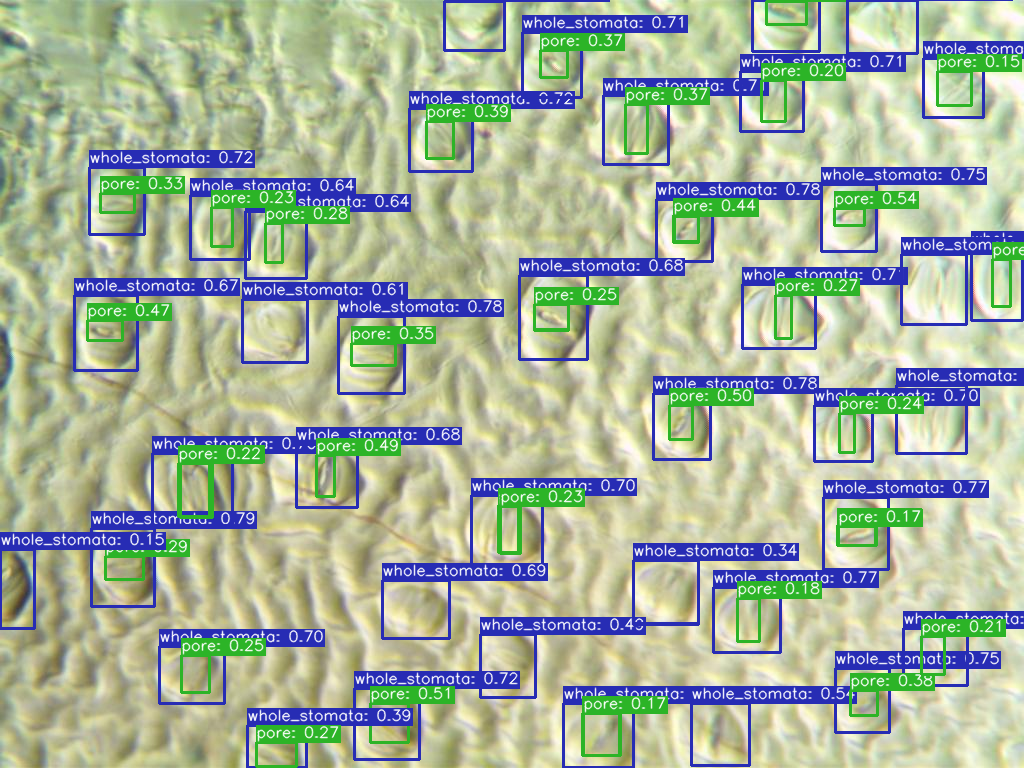

In [18]:
result.visualization

In [19]:
# Load folder of images
import glob

image_paths = glob.glob("/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/*.jpg")

image_paths



['/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/Cottonhouse-SG-846-1-40x-4_jpg.rf.88662a9475a101afe63ed8ea94ffd25e.jpg',
 '/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/AE-02-L4-40-X-03_jpg.rf.7a4584f0f288a7655de7c190869cbac5.jpg',
 '/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/A1-R1-T3-3-20X_jpg.rf.4189f066542e7212fd00e6ed0f0340d5.jpg',
 '/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/C3-R1-T11-Oneal-2-20X_jpg.rf.a0cbfe076ef4444970396596cbc866c3.jpg',
 '/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/WO-02-L7-40-X-09_jpg.rf.878dcc8d6d0fbb702688d15f69c2514b.jpg',
 '/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/Cottonhouse-SG-843-2-40x-5_jpg.rf.37fe21e711fc4fbaf65e9f8db81d990f.jpg',
 '/home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/A1-R1-T3-5-20X_jpg.rf.077be425a80139f3b6999d81d7d53ba0.jpg',

2025-03-17 11:07:30.039 | INFO     | deimkit.predictor:predict_batch:486 - Processing batch of 6 images with batch_size=16
2025-03-17 11:07:30.040 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 0 from path: /home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/A4-R1-T21-Wozencraft-10-20X_jpg.rf.1d010a796dd944c0f29625f435e3044e.jpg
2025-03-17 11:07:30.051 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 1 from path: /home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/M-b5-7938-july-20-2_jpg.rf.93ba3d49b0383e48f02f9c5e2dc8edc3.jpg
2025-03-17 11:07:30.079 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 2 from path: /home/dnth/Desktop/DEIMKit/dataset_collections/leaf_stomata2.v1i.coco/test/Cottonhouse-SG-844-2-40x-6_jpg.rf.fca5ccc81dedab5085ebe3b2f15e4756.jpg
2025-03-17 11:07:30.093 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 3 from path: /home/dnt

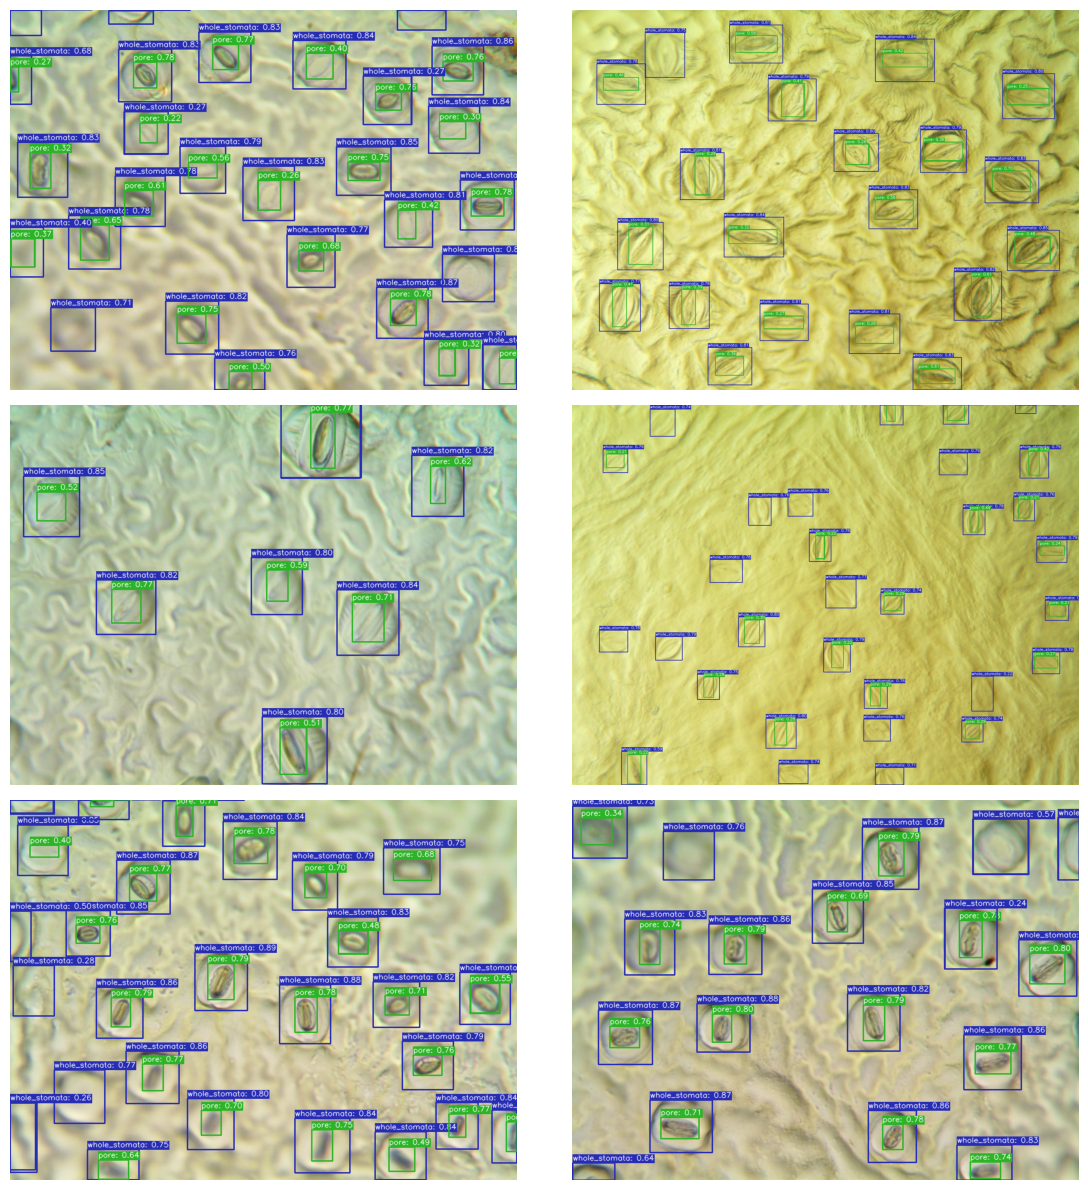

In [20]:
import random

random = random.sample(image_paths, 6)
results = model.predict_batch(random, conf_threshold=0.2, visualize=True)


import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4 * n_rows))

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result.visualization)
    plt.axis("off")
plt.tight_layout()
plt.show()